## PCA

We will use some datasets to show the power of PCA.

* iris
* 8x8 mnist

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Iris

It is the normal iris dataset.

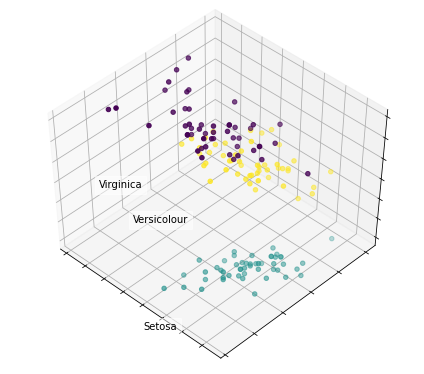

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

Let's try PCA to reduce the dimension of iris data. First, we randomly split the iris dataset into two datasets, one for training (70%) and one for testing (30%).

In [0]:
from sklearn.model_selection import train_test_split

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

### Question #1:
Try to use a decision tree to train the traing dataset. How to find the best max_depth of the tree?

### I start with max_depth 3 and see if leaf nodes are not in a small sample amoumt, if it is, then reduce the max_depth.

In [4]:
from sklearn.tree import DecisionTreeClassifier
irisClf = DecisionTreeClassifier(max_depth = 3) # Decision trees with depth = 3
irisClf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

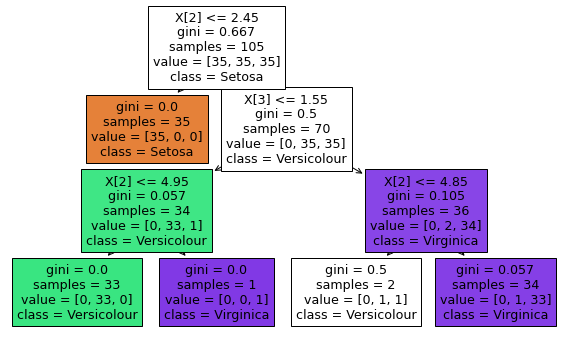

In [5]:
from sklearn import tree
plt.figure(figsize = (10, 6))
tree.plot_tree(irisClf,
               class_names = ['Setosa', 'Versicolour', 'Virginica'],
               filled = True)
plt.show()

### while the leaf nodes have a few samples may cause overfitting, so try to reduce the max_depth of the tree. 

In [6]:
irisClf = DecisionTreeClassifier(max_depth = 2) # Decision trees with depth = 2
irisClf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

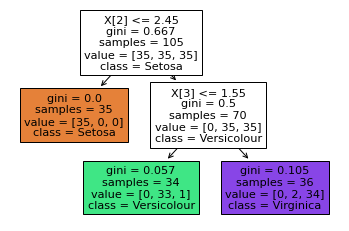

In [7]:
tree.plot_tree(irisClf,
               class_names = ['Setosa', 'Versicolour', 'Virginica'],
               filled = True)
plt.show()

### Question #2:

Predict the testing data. What is your accuracy_score?

In [8]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Predicting results for test dataset
y_pred = irisClf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

Accuracy: 0.8888888888888888


### Question #3:

Try to use PCA to reduce the dimensionality to 2. Use the entire iris dataset. (DO NOT use training/testing data.) Plot 2-d figure with PCA data and their labels.

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

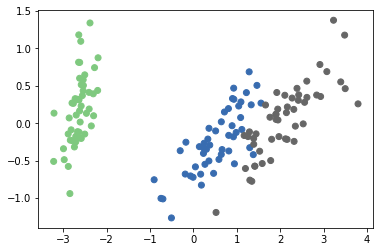

In [15]:
# Plotting the results of PCA
plt.scatter(X_pca[:, 0],X_pca[:, 1], c=y, cmap=plt.cm.get_cmap('Accent', 3))

### Question #4:

Now, split the PCA data into two datasets (training 70%, testing 30%) and build a decision tree. What is the result? 

In [17]:
# Test-train split and apply PCA
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=.3)
irisClf2 = DecisionTreeClassifier(max_depth = 2) # Decision trees with depth = 2
irisClf2.fit(X_pca_train, y_pca_train)
y_pca_pred = irisClf2.predict(X_pca_test)
score2 = accuracy_score(y_pca_test, y_pca_pred)
print('Accuracy:', score2)

Accuracy: 0.9555555555555556


### Question #5:

Is the accuracy higher? Why? Please give us a reasonable explaination.  

### Answer #5

Yes, AC is higher. PCA reduct dimensions by feature trnsform, and in this way, we have a better explanatory ability with fewer features. By dimension reduction without lossing information, PCA can avoid overfitting effectively. Thus, Accuracy is higher when features have low collinearity.

### Question #6:

How do you even get a higher accuracy rate? It is an open question, and try your best.

Hint: PCA parameters, data preprocessing and feature engineering.

## MNIST

Let's look at a famous handwritten numbers dataset.

In [0]:
digits = datasets.load_digits()
digi_X = digits.data
digi_y = digits.target

Each data sample has 64 features that represent a 8*8 grid. Each feature is a real number (0.0, 1.0), while 1 is white and 0 is black. Here are some examples.

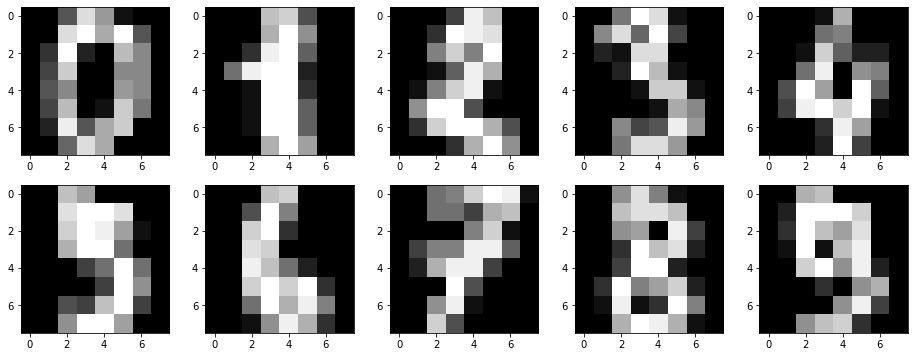

In [19]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digi_X[i,:].reshape([8,8]), cmap='gray');

### Question #7:

Try to use PCA to reduce the MNIST data to 2-dimension, and plot the 2-d figure with labels.

In [0]:
# Try plt.scatter and 'c' parameter
# Try plt.colorbar()
pca3 = decomposition.PCA(n_components=2)
pca3.fit(digi_X)
X_pca3 = pca3.transform(digi_X)

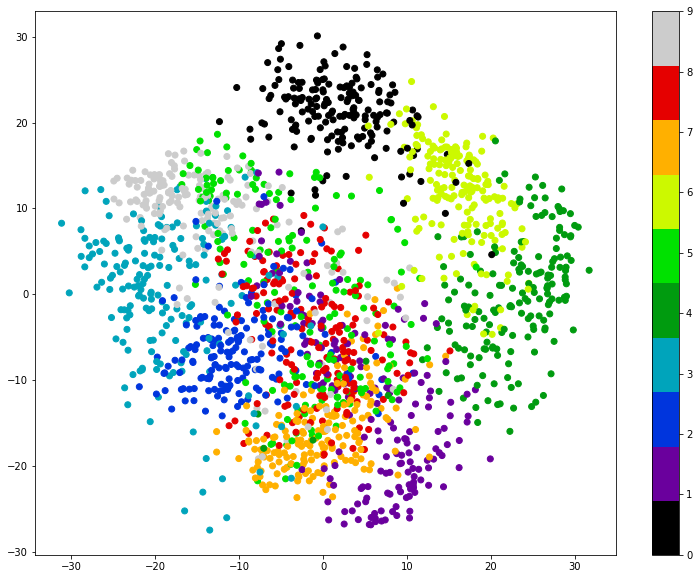

In [47]:
fig = plt.figure(figsize=(13,10))
plt.scatter(X_pca3[:, 0],X_pca3[:, 1], c=digi_y , cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

### Question #8:

Why the figure looks bad? How many components would be better?

In [0]:
# hint: take a look at pca.explained_variance_ratio_
pca4 = decomposition.PCA(n_components=64)
pca4.fit(digi_X)

PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

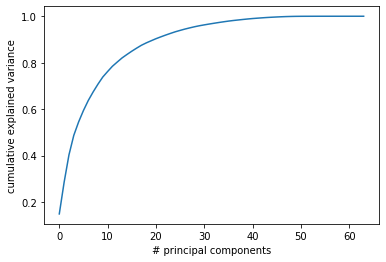

In [0]:
cum_explained_var_ratio = np.cumsum(pca4.explained_variance_ratio_)
plt.plot(cum_explained_var_ratio)
plt.xlabel('# principal components')
plt.ylabel('cumulative explained variance');

i think 30 principal components might be a good amount by the above curbe. 

### Bonus #1:

Try another technique for dimension reduction named "TSNE". Take a look at TSNE's document. Could you explain why TSNE is better?

In [0]:
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(digi_X)

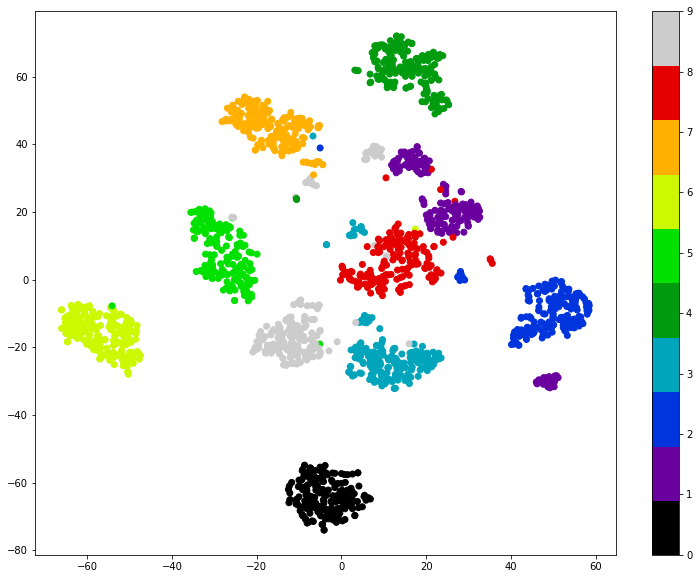

In [52]:
fig = plt.figure(figsize=(13,10))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=digi_y , cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

i don't know why t-sne is better actually. i tried to google it and found some information that i don't really understand:
  * SNE 使用條件機率和高斯分佈來定義高維和低維中樣本點之間的相似度，用 KL 散度來衡量兩條件機率分佈總和之間的相似度，並將其作為價值函數以梯度下降法求解。
  * t-SNE 使用 t 分佈定義低維時的機率分佈來減緩維數災難（curse of dimensionality）造成的擁擠問題（crowding problem）。

## Hierarchical Clustering

Here is an example of Hierarchical Clustering.

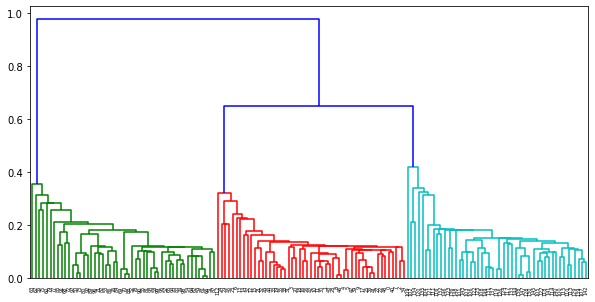

In [0]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

h_X = np.zeros((150, 2))

np.random.seed(seed=42)
h_X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
h_X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

h_X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
h_X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

h_X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
h_X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(h_X) # pdist calculates the uxpper triangle of the distance matrix

Z = hierarchy.linkage(distance_mat, 'single') # linkage is agglomerative clustering algorithm
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

#### Question #9:

Try to cluster iris data using the above codes. Show misclustered data points.

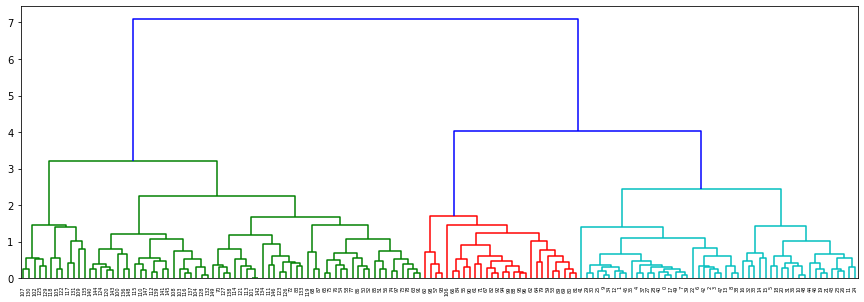

In [54]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(X)
Z = hierarchy.linkage(distance_mat, 'complete') 
plt.figure(figsize=(15, 5))
dn = hierarchy.dendrogram(Z, color_threshold=3.5)